In [1]:
import tensorflow as tf

deep_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None,1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

In [2]:
import pandas as pd
from pathlib import Path

path = Path("datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]  # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)  # no need for total, it's just bus + rail
df = df.drop_duplicates()  # remove duplicated months (2011-10 and 2014-07)

rail_train = df["rail"]["2016-01":"2018-12"] / 1e6
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

seq_length = 56
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_train.to_numpy(),
    targets = rail_train[seq_length:],
    sequence_length = seq_length,
    batch_size = 32,
    shuffle = True,
    seed=42
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_valid.to_numpy(),
    targets=rail_valid[seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)

In [3]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=50, restore_best_weights=True
)

opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

deep_rnn.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = opt,
    metrics=["mae"]
)

history = deep_rnn.fit(train_ds, validation_data=valid_ds, epochs=500, callbacks=early_stopping_cb)

Epoch 1/500
33/33 [==============================] - 5s 58ms/step - loss: 0.0418 - mae: 0.2229 - val_loss: 0.0119 - val_mae: 0.1336
Epoch 2/500
33/33 [==============================] - 1s 27ms/step - loss: 0.0111 - mae: 0.1219 - val_loss: 0.0050 - val_mae: 0.0815
Epoch 3/500
33/33 [==============================] - 1s 30ms/step - loss: 0.0071 - mae: 0.0890 - val_loss: 0.0025 - val_mae: 0.0509
Epoch 4/500
33/33 [==============================] - 1s 29ms/step - loss: 0.0045 - mae: 0.0659 - val_loss: 0.0063 - val_mae: 0.0930
Epoch 5/500
33/33 [==============================] - 1s 33ms/step - loss: 0.0044 - mae: 0.0661 - val_loss: 0.0022 - val_mae: 0.0444
Epoch 6/500
33/33 [==============================] - 1s 28ms/step - loss: 0.0037 - mae: 0.0563 - val_loss: 0.0020 - val_mae: 0.0382
Epoch 7/500
33/33 [==============================] - 1s 25ms/step - loss: 0.0036 - mae: 0.0554 - val_loss: 0.0019 - val_mae: 0.0372
Epoch 8/500
33/33 [==============================] - 1s 27ms/step - loss: 0.

33/33 [==============================] - 1s 34ms/step - loss: 0.0027 - mae: 0.0447 - val_loss: 0.0021 - val_mae: 0.0349
Epoch 63/500
33/33 [==============================] - 1s 38ms/step - loss: 0.0034 - mae: 0.0555 - val_loss: 0.0020 - val_mae: 0.0346
Epoch 64/500
33/33 [==============================] - 1s 29ms/step - loss: 0.0030 - mae: 0.0502 - val_loss: 0.0035 - val_mae: 0.0659
Epoch 65/500
33/33 [==============================] - 1s 33ms/step - loss: 0.0033 - mae: 0.0556 - val_loss: 0.0019 - val_mae: 0.0362
Epoch 66/500
33/33 [==============================] - 1s 29ms/step - loss: 0.0026 - mae: 0.0430 - val_loss: 0.0020 - val_mae: 0.0371
Epoch 67/500
33/33 [==============================] - 1s 35ms/step - loss: 0.0027 - mae: 0.0469 - val_loss: 0.0019 - val_mae: 0.0377
Epoch 68/500
33/33 [==============================] - 1s 34ms/step - loss: 0.0027 - mae: 0.0455 - val_loss: 0.0018 - val_mae: 0.0353
Epoch 69/500
33/33 [==============================] - 1s 33ms/step - loss: 0.0025 

33/33 [==============================] - 1s 23ms/step - loss: 0.0022 - mae: 0.0398 - val_loss: 0.0020 - val_mae: 0.0369
Epoch 124/500
33/33 [==============================] - 1s 24ms/step - loss: 0.0025 - mae: 0.0424 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 125/500
33/33 [==============================] - 1s 23ms/step - loss: 0.0023 - mae: 0.0390 - val_loss: 0.0022 - val_mae: 0.0430
Epoch 126/500
33/33 [==============================] - 1s 25ms/step - loss: 0.0026 - mae: 0.0457 - val_loss: 0.0019 - val_mae: 0.0337
Epoch 127/500
33/33 [==============================] - 1s 25ms/step - loss: 0.0024 - mae: 0.0415 - val_loss: 0.0020 - val_mae: 0.0385
Epoch 128/500
33/33 [==============================] - 1s 30ms/step - loss: 0.0025 - mae: 0.0446 - val_loss: 0.0023 - val_mae: 0.0440
Epoch 129/500
33/33 [==============================] - 1s 26ms/step - loss: 0.0026 - mae: 0.0446 - val_loss: 0.0031 - val_mae: 0.0573
Epoch 130/500
33/33 [==============================] - 1s 32ms/step - loss: 

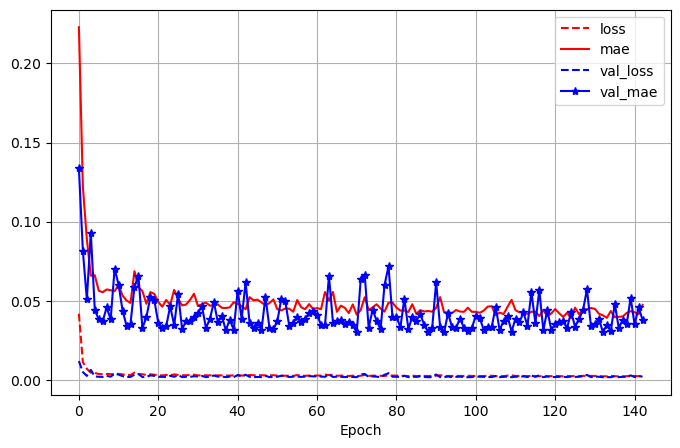

In [4]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize = (8,5), grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()